In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
# Import functions and data
from netopt import netopt, print_dict, plot_map
from data_structures import (show_data, set_capacity, set_all_capacities, set_fixed_cost,
                             set_all_fixed_costs, scale_demand, scale_all_demands, set_demand,
                             set_all_demands, calculate_dm)
from projectwork_data import warehouses, customers_as_is, customers_to_be


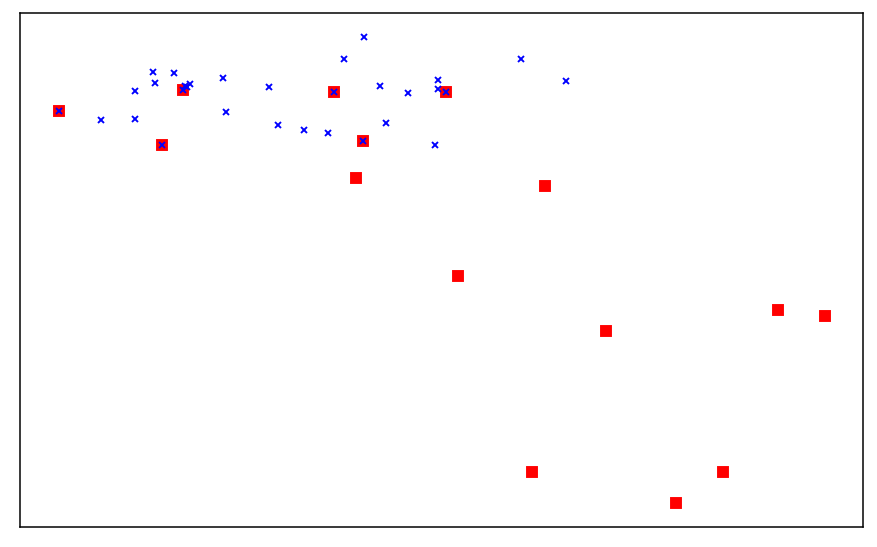

In [10]:
# Plot the data in the as-is scenario
# The variable customers_as_is contains the existing customers, while the variable customers_to_be contains both
# existing and prospective customers
# The variable warehouses contains all the candidate locations, including the existing one (Bologna, id 6)

plot_map(warehouses=warehouses,
         customers=customers_as_is,
         warehouse_markersize=5,
         warehouse_marker='s',
         warehouse_markercolor='red',
         customer_markersize=3,
         customer_marker='x',
         customer_markercolor='blue')


In [8]:
# Show the customers data in tabular form. Use the data in the column Id to refer to single customers or warehouses
show_data(customers_as_is)


|    |   Id | Identifier         | City               |   Latitude |   Longitude |   Demand |
|---:|-----:|:-------------------|:-------------------|-----------:|------------:|---------:|
|  0 |    0 | Milan              | Milan              |    45.4669 |      9.19   |     1366 |
|  1 |    1 | Turin              | Turin              |    45.0667 |      7.7    |      871 |
|  2 |    2 | Genoa              | Genoa              |    44.4072 |      8.934  |      580 |
|  3 |    3 | Bologna            | Bologna            |    44.4939 |     11.3428 |      389 |
|  4 |    4 | Venice             | Venice             |    45.4397 |     12.3319 |      261 |
|  5 |    5 | Verona             | Verona             |    45.4386 |     10.9928 |      257 |
|  6 |    6 | Padova             | Padova             |    45.4064 |     11.8778 |      210 |
|  7 |    7 | Trieste            | Trieste            |    45.6503 |     13.7703 |      204 |
|  8 |    8 | Brescia            | Brescia            |    4

In [9]:
# You can show warehouses data as well
show_data(warehouses)


|    |   Id | Identifier         | City               |   Latitude |   Longitude |   Capacity |   Fixed cost |
|---:|-----:|:-------------------|:-------------------|-----------:|------------:|-----------:|-------------:|
|  0 |    0 | Rome               | Rome               |    41.8931 |     12.4828 |      12000 |        10000 |
|  1 |    1 | Milan              | Milan              |    45.4669 |      9.19   |      12000 |        10000 |
|  2 |    2 | Naples             | Naples             |    40.8333 |     14.25   |      12000 |        10000 |
|  3 |    3 | Turin              | Turin              |    45.0667 |      7.7    |      11000 |        10000 |
|  4 |    4 | Palermo            | Palermo            |    38.1157 |     13.3613 |      10000 |        10000 |
|  5 |    5 | Genoa              | Genoa              |    44.4072 |      8.934  |       6000 |         6000 |
|  6 |    6 | Bologna            | Bologna            |    44.4939 |     11.3428 |       7000 |         6000 |
|

In [ ]:
# Calculate the distance matrixes. The distance matrixes are necessary for the model
dist_as_is = calculate_dm(warehouses=warehouses,
                          customers=customers_as_is)

dist_to_be = calculate_dm(warehouses=warehouses,
                          customers=customers_to_be)

In [12]:
# The functions available are the following:
# netopt() - Solve the optimization model
# set_capacity() - change the capacity of a warehouse
# set_all_capacities() - change the capacity of all warehouses
# set_fixed_cost() - change the yearly fixed cost of a warehouse
# set_all_fixed_costs() - change the yearly fixed cost of all warehouses
# scale_demand() - scale the demand of a customer by a factor
# scale_all_demands() - scale the demand of all customer by a factor
# set_demand() - change the demand of a customer
# set_all_demands() - change the demand of all cus

# type the function name without parentheses and preceeded by ? to access a short description of the function and the parameters
# Example:
?netopt